In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import AutoMinorLocator
import datetime as dt
import numpy as np
import gc

In [2]:
df = pd.read_csv('tags.csv')
df.head()

,userId,movieId,tag,timestampForTag
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [3]:
del df['userId']

In [4]:
df2 = pd.read_csv('user_movie_view.csv')
del df2["userId"]
df2.head()

,movieId,tstamp
0,1,22-09-2019 03:04
1,1,01-10-2009 01:56
2,1,17-04-2012 20:56
3,1,23-09-2015 21:34
4,1,01-01-2019 19:00


In [5]:
df['timestamp'] = pd.to_datetime(df['timestampForTag'], unit='s')
del df['timestampForTag']
del df['movieId']
df.head()

,tag,timestamp
0,classic,2015-08-13 13:25:55
1,sci-fi,2015-08-13 13:24:16
2,dark comedy,2019-11-16 22:33:18
3,great dialogue,2019-11-16 22:33:24
4,so bad it's good,2019-11-16 22:30:55


In [6]:
df.dtypes

tag                  object
timestamp    datetime64[ns]
dtype: object

In [7]:
df = df.sort_values(by=['timestamp'])
df.set_index('timestamp',inplace=True)
df.dtypes

tag    object
dtype: object

In [8]:
start = df.index.min()
end = df.index.max()
df4 = pd.DataFrame(columns=['timestamp','percentage','tags','total'])
delta = dt.timedelta(days=31)
i = 0
e = start
perc = 0
while start <= end:
    e = start+delta
    tag=0
    total=0
    for a in df.itertuples():
        if start<=a.Index<e:
            if a.tag=='christmas':
                tag+=1
            total+=1
    perc = (tag/total)*100
    df4.loc[i] = [start,perc,tag,total]
    i+=1
    start = e

In [27]:
df4['tags'].idxmax()

TypeError: reduction operation 'argmax' not allowed for this dtype

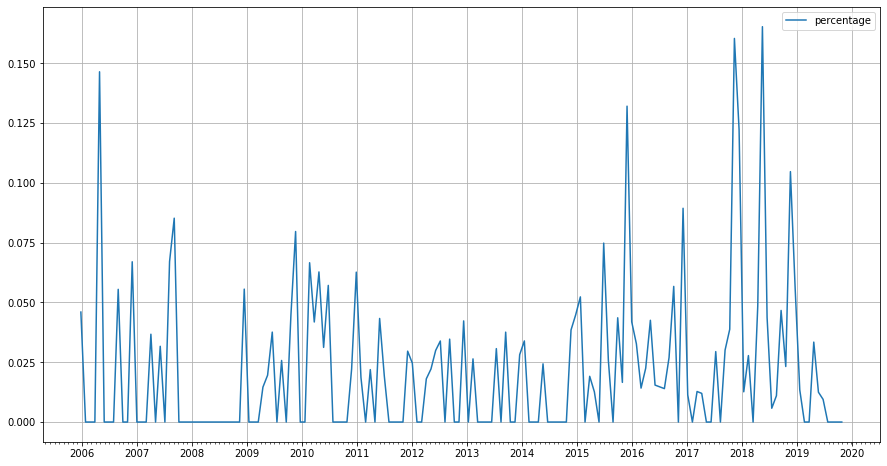

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
import matplotlib.dates as mdate
fig.set_size_inches(15,8)

# Major ticks every 20, minor ticks every 5
ax.xaxis_date()
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

# And a corresponding grid
plt.grid(which='major')

#adding minor ticks
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(12))
#ax.xaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter(useMathText=True))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

plt.plot(df4['timestamp'], df4['percentage'],label='percentage')

plt.legend()
#plt.savefig('tag_to_weekly_graph(pg_view).pdf')